# Decision Tree

In [1]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
 
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/BankChurners.csv")

In [6]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [7]:
xl = pd.DataFrame(data[["Attrition_Flag","Income_Category", "Card_Category","Education_Level"]])  

In [8]:
xl = xl.iloc[:200, :]
xl

,Attrition_Flag,Income_Category,Card_Category,Education_Level
0,Existing Customer,$60K - $80K,Blue,High School
1,Existing Customer,Less than $40K,Blue,Graduate
2,Existing Customer,$80K - $120K,Blue,Graduate
3,Existing Customer,Less than $40K,Blue,High School
4,Existing Customer,$60K - $80K,Blue,Uneducated
...,...,...,...,...
195,Existing Customer,Less than $40K,Blue,High School
196,Existing Customer,$120K +,Blue,High School
197,Existing Customer,$80K - $120K,Blue,Uneducated
198,Attrited Customer,Less than $40K,Blue,High School


In [9]:
from sklearn import preprocessing
le= preprocessing.LabelEncoder()
xl['Attrition_Flag']=le.fit_transform(xl['Attrition_Flag'])
xl['Income_Category']=le.fit_transform(xl['Income_Category'])
xl['Card_Category']=le.fit_transform(xl['Card_Category'])
xl['Education_Level']=le.fit_transform(xl['Education_Level'])

In [10]:
xl

,Attrition_Flag,Income_Category,Card_Category,Education_Level
0,1,2,0,3
1,1,4,0,2
2,1,3,0,2
3,1,4,0,3
4,1,2,0,5
...,...,...,...,...
195,1,4,0,3
196,1,0,0,3
197,1,3,0,5
198,0,4,0,3


In [11]:
#Extracting independent and dependent variable  
x= xl.iloc[:, [1,2,3]].values  
y= xl.iloc[:, 0].values  

In [12]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [13]:
from sklearn.tree import DecisionTreeClassifier  
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

Text(42.0, 0.5, 'Truth')

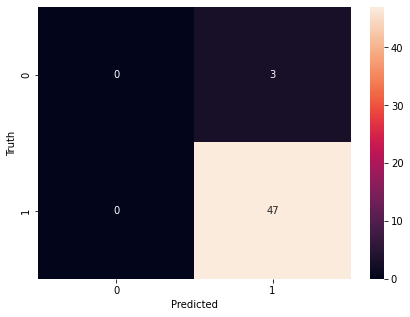

In [16]:
y_pred_gini = clf_gini.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred_gini)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9400


In [ ]:
y_pred_train_gini = clf_gini.predict(x_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9267


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.9267
Test set score: 0.9400


In [ ]:
# Here, the training-set accuracy score is 0.9267 while the test-set accuracy to be 0.9400.
# These two values are quite comparable. So, there is no sign of overfitting.

[Text(0.5, 0.875, 'X[0] <= 2.5\ngini = 0.136\nsamples = 150\nvalue = [11, 139]'),
 Text(0.25, 0.625, 'X[2] <= 0.5\ngini = 0.088\nsamples = 65\nvalue = [3, 62]'),
 Text(0.125, 0.375, 'X[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1875, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.375, 0.375, 'X[0] <= 1.5\ngini = 0.064\nsamples = 60\nvalue = [2, 58]'),
 Text(0.3125, 0.125, 'gini = 0.102\nsamples = 37\nvalue = [2, 35]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(0.75, 0.625, 'X[2] <= 5.5\ngini = 0.171\nsamples = 85\nvalue = [8, 77]'),
 Text(0.625, 0.375, 'X[2] <= 3.5\ngini = 0.151\nsamples = 73\nvalue = [6, 67]'),
 Text(0.5625, 0.125, 'gini = 0.188\nsamples = 57\nvalue = [6, 51]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.875, 0.375, 'X[0] <= 3.5\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.8125, 0.125, 'gini = 0.44

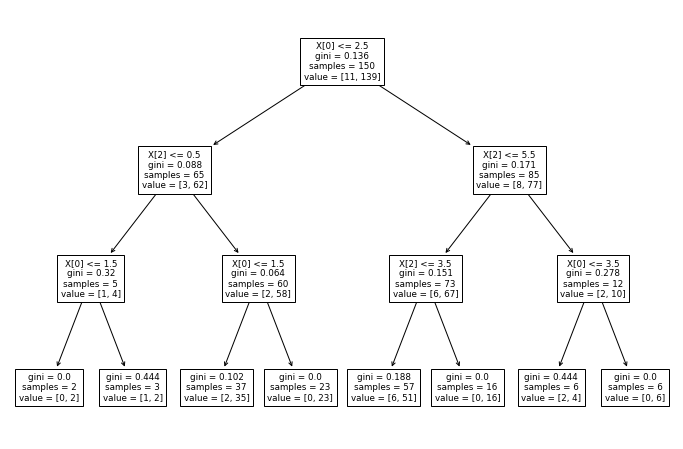

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train, y_train)) 

# Linear Regression

In [3]:
import pandas as pd
 
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/Folds5x2_pp.csv")

In [4]:
data

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [ ]:
data.iloc[:, :] = MinMaxScaler().fit_transform(data.iloc[:, :])

In [ ]:
data

,AT,V,AP,RH,PE
0,0.184986,0.274199,0.444197,0.863941,0.797616
1,0.618414,0.589502,0.458055,0.652011,0.337616
2,0.791218,0.561210,0.352883,0.219169,0.245033
3,0.488952,0.432918,0.354615,0.686729,0.434834
4,0.283003,0.272242,0.599852,0.960322,0.585033
...,...,...,...,...,...
9563,0.377054,0.419217,0.467953,0.634987,0.560662
9564,0.895184,0.935765,0.430834,0.457909,0.167417
9565,0.401700,0.319929,0.527345,0.711796,0.605298
9566,0.448725,0.614057,0.635734,0.926139,0.406225


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,0.505417,0.515050,0.504060,0.640067,0.451722
std,0.211118,0.226119,0.146963,0.195714,0.226053
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.331445,0.291459,0.401138,0.506267,0.258146
50%,0.525071,0.475445,0.496164,0.662399,0.414437
75%,0.677337,0.732740,0.603069,0.794504,0.638013
max,1.000000,1.000000,1.000000,1.000000,1.000000


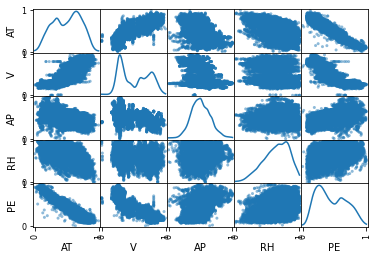

In [ ]:

from pandas.plotting import scatter_matrix
scatter_matrix(data, diagonal="kde");


In [ ]:
# linear relationship between  PE and negative of AT
# linear relationship between PE and negative of V

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


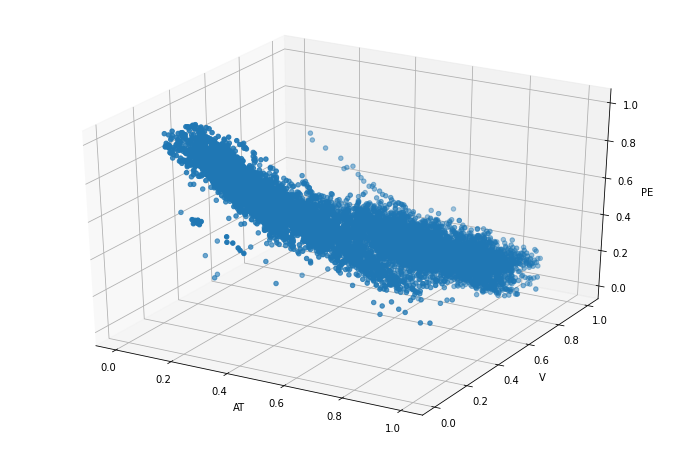

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection="3d")
fig.add_axes(ax)
ax.scatter(data["AT"], data["V"], data["PE"])
ax.set_xlabel("AT")
ax.set_ylabel("V")
ax.set_zlabel("PE")
ax.set_facecolor("white")

In [ ]:
import statsmodels.formula.api as smf

lm = smf.ols(formula="PE ~ AT + V + AP + RH", data=data).fit()
lm.params

Intercept    1.091914
AT          -0.924586
V           -0.174121
AP           0.033229
RH          -0.156170
dtype: float64

In [ ]:
lm.predict(pd.DataFrame({"AT": [9.48], "V": [44.71], "AP": [1019.12], "RH": [66.43]}))

0    8.031637
dtype: float64

In [ ]:
# The predicted output power for this combination of inputs is 8 MW

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Tue, 06 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:11:45   Log-Likelihood:                 13285.
No. Observations:                9568   AIC:                        -2.656e+04
Df Residuals:                    9563   BIC:                        -2.652e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0919      0.006    187.447      0.000       1.080       1.103
AT            -0.9246      0.007   -129.342      0.000      -0.939      -0.911
V             -0.1741      0.005    -32.122      0.000      -0.185      -0.163
AP             0.0332      0.005      6.564      0.000       0.023       0.043
RH            -0.1562      0.004    -37.918      0.000      -0.164      -0.148
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""